In [1]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\AURA\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\AURA\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\AURA\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\AURA\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\AURA\AppData\Roaming\nltk_data...
[nltk_

True

In [5]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

# NLTK

In [7]:
text1 = "In Brazil they drive on the right-hand side of the road. has a large coastline on the eastern side of South America"

from nltk.tokenize import word_tokenize
token1 = word_tokenize(text1)
token1

['In',
 'Brazil',
 'they',
 'drive',
 'on',
 'the',
 'right-hand',
 'side',
 'of',
 'the',
 'road',
 '.',
 'has',
 'a',
 'large',
 'coastline',
 'on',
 'the',
 'eastern',
 'side',
 'of',
 'South',
 'America']

In [9]:
from nltk.probability import FreqDist
fdist1 = FreqDist(token1)
fdist1


FreqDist({'the': 3, 'on': 2, 'side': 2, 'of': 2, 'In': 1, 'Brazil': 1, 'they': 1, 'drive': 1, 'right-hand': 1, 'road': 1, ...})

In [11]:
fdist2 = fdist1.most_common(10)
fdist2

[('the', 3),
 ('on', 2),
 ('side', 2),
 ('of', 2),
 ('In', 1),
 ('Brazil', 1),
 ('they', 1),
 ('drive', 1),
 ('right-hand', 1),
 ('road', 1)]

<AxesSubplot: xlabel='Key'>

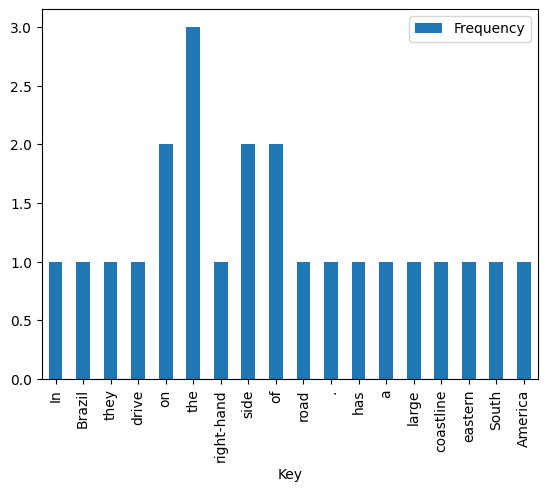

In [15]:
import pandas as pd

df_freq_tokens = pd.DataFrame.from_dict(fdist1, orient = "index")
df_freq_tokens.columns = ["Frequency"]
df_freq_tokens.index.name = "Key"

df_freq_tokens.plot(kind = "bar")

In [17]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

a = set(stopwords.words("english"))

text2 = "Christiano Ronaldo was born on February 5, 1985, in Funchal, Madeira, Portugal."

text2_lower = word_tokenize(text2.lower())

filtered_words = [word for word in text2_lower if word not in a]

print(filtered_words)


['christiano', 'ronaldo', 'born', 'february', '5', ',', '1985', ',', 'funchal', ',', 'madeira', ',', 'portugal', '.']


In [19]:
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

S = "presumably I would like to MultiPly my provision, saying tHat without crYing"
print("Sentence:", S)

# List of stemmers
stemmer_list = [LancasterStemmer, PorterStemmer, SnowballStemmer]
names = ["Lancaster", "Porter", "Snowball"]

# Applying each stemmer
for stemmer_name, stem in zip(names, stemmer_list):
    if stemmer_name == "Snowball":
        st = stem("english")
    else:
        st = stem()
    
    # Apply stemming and join the stemmed words into a sentence
    stemmed_words = ' '.join(st.stem(word) for word in S.split())
    
    # Print results
    print(f"{stemmer_name}: {stemmed_words}")


Sentence: presumably I would like to MultiPly my provision, saying tHat without crYing
Lancaster: presum i would lik to multiply my provision, say that without cry
Porter: presum i would like to multipli my provision, say that without cri
Snowball: presum i would like to multipli my provision, say that without cri


In [20]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
print("rocks:", lemmatizer.lemmatize("rocks"))
print("corpora:", lemmatizer.lemmatize("corpora"))

rocks: rock
corpora: corpus


In [21]:
from nltk import pos_tag
P = "I am currently learning NLP in English, but if possible I want to know NLP in Indonesian language too"
tokens2 = word_tokenize(P)
print(pos_tag(tokens2))

[('I', 'PRP'), ('am', 'VBP'), ('currently', 'RB'), ('learning', 'VBG'), ('NLP', 'NNP'), ('in', 'IN'), ('English', 'NNP'), (',', ','), ('but', 'CC'), ('if', 'IN'), ('possible', 'JJ'), ('I', 'PRP'), ('want', 'VBP'), ('to', 'TO'), ('know', 'VB'), ('NLP', 'NNP'), ('in', 'IN'), ('Indonesian', 'JJ'), ('language', 'NN'), ('too', 'RB')]


# TEXT BLOB

In [22]:
from textblob import TextBlob

T = "Hello, Mr. Man. He smiled!! This, i.e. that, is it."
sentence_tokens = TextBlob(T).sentences

#tokenisasi kata
print(TextBlob(T).words)

#tokenisasi kalimat
print([str(sent) for sent in sentence_tokens])

['Hello', 'Mr', 'Man', 'He', 'smiled', 'This', 'i.e', 'that', 'is', 'it']
['Hello, Mr. Man.', 'He smiled!!', 'This, i.e.', 'that, is it.']


# Stemming, Lemmatizer, Post Tagging dengan Text Blob

In [24]:
from textblob import Word, TextBlob

print("Stem:", Word("running").stem())

print("Lemmatize:", Word("went").lemmatize('v'))

P = "TextBlob is a great library for processing textual data."

# POS tagging and printing
for word, pos in TextBlob(P).tags:
    print(f"{word} ({pos})", end=", ")


Stem: run
Lemmatize: go
TextBlob (NNP), is (VBZ), a (DT), great (JJ), library (NN), for (IN), processing (VBG), textual (JJ), data (NNS), 

# Sastrawi

In [27]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
stop_word = factory.create_stop_word_remover()

kalimat = "Andi kerap melakukan transaksi rutin secara daring atau online. Menurut Andi belanja online lebih praktis."

stop = stop_word.remove(kalimat.lower())

print(stop)


andi kerap melakukan transaksi rutin daring online. andi belanja online lebih praktis.


In [28]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stemmer = StemmerFactory().create_stemmer()

I = "perayaan itu berbarengan dengan saat kita berpergian ke Makassar"
print(stemmer.stem(I))
print(stemmer.stem("Perayaan Bepergian Menyuarakan"))

raya itu bareng dengan saat kita pergi ke makassar
raya pergi suara


# WORDCLOUD

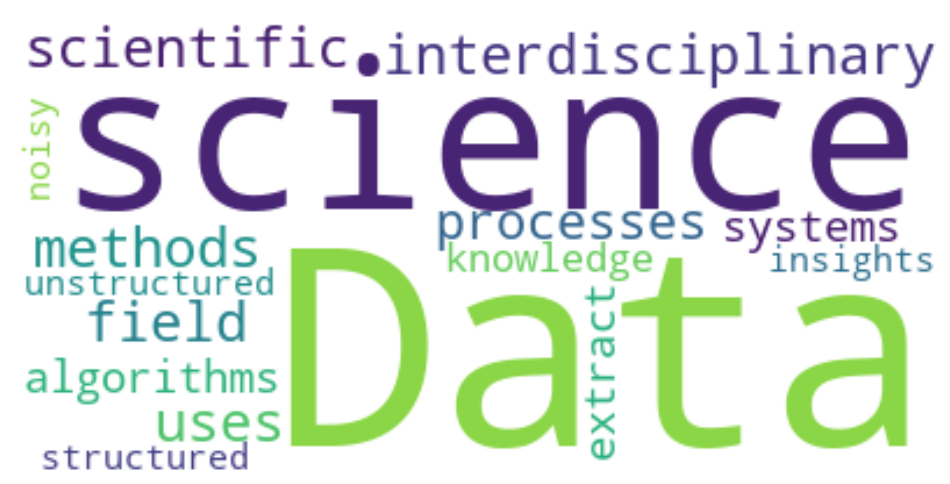

In [30]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud

string = "Data science is an interdisciplinary field that uses scientific methods, processes, algorithms, and systems to extract knowledge and insights from noisy, structured, and unstructured data."

word_cloud = WordCloud(background_color="white").generate(string)

plt.figure(figsize=(12, 12))
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()


# CLUSTERING

## K-MEANS

In [1]:
import pickle

import os
import re
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups


stop_words = set(stopwords.words('english'))

src_name = "20newsgroup.pckl"
src_path = os.path.join("data datmin ii", src_name)

with open(src_path, 'rb') as fin:
    data = pickle.load(fin)

docs = [doc for doc in data.data]
label = data.target

def preprocess(doc):
    sents = word_tokenize(doc)
    sents_tok = [t for t in sents if t not in stop_words]
    sents = [t for t in sents_tok]
    for s in sents:
        s = s.strip().lower()
        s = s.replace("\n", " ")
        s = re.sub(r'[^a-zA-Z0-9 ]', '', s)
        s = re.sub(r'\+', '', s)
        sents_tok.append(s)
    return " ".join(sents_tok)

docs_clear = []
for d in docs:
    docs_clear.append(preprocess(d))

print("DONE!")


DONE!


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import cluster

tfidf_vectorizer = TfidfVectorizer(max_df = 0.95, min_df = 2)
X = tfidf_vectorizer.fit_transform(docs_clear)
print(X.shape)

(1653, 11201)


In [6]:
k = 3
seed = 99
km = cluster.KMeans(n_clusters = k, init = 'random', max_iter = 300, random_state = seed)
km.fit(X)

C_km = km.predict(X)
C_km[:10]

c:\Users\AURA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 0, 2, 0, 0, 0, 0, 2, 0, 0])

## K MEANS ++

In [7]:
kmPP = cluster.KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, tol = 0.0001, random_state = seed)
kmPP.fit(X)
C_kmpp = kmPP.predict(X)
C_kmpp[:10]

c:\Users\AURA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 2, 0, 2, 2, 2, 2, 2, 2, 2])

In [18]:
import numpy as np

cluster_2_indices = np.where(C_kmpp == 2)[0]  
cluster_2_docs = [docs_clear[i] for i in cluster_2_indices]  

# Langkah 3: Tampilkan beberapa contoh data dari cluster 2
print(f"Total data in cluster 2: {len(cluster_2_docs)}\n")
print("Contoh data dalam cluster 2:\n")
for i, doc in enumerate(cluster_2_docs[:5]): 
    print(f"Dokumen {i+1}:\n{doc}\n")


Total data in cluster 2: 1337

Contoh data dalam cluster 2:

Dokumen 1:
I hear question asked radio news update case . ( They talking ongoing trial audio clips ) . Immediately defense attorney asked question , `` Objection ! '' heard background . The clip ended point I n't know objection upheld . I ca n't imagine NC * * bad . This I n't hear audio clip heard reported number times news stories trial . Now `` purpose '' thing stretching , I think something like -- coming . If somebody else remebers better I second point , feel free clarify . Frank -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- Frank R. Chloupek CHLOUPEK @ ohstpy.mps.ohio-state.edu Department Physics -- * The * Ohio State University ( Not Ohio State University ) i hear question asked radio news update case   they talking ongoing trial audio clips   immediately defense attorney asked question   objection   heard background  the clip ended point i nt know objec

## DB SCAN

In [8]:
import numpy as newsgroups_train
dbscan = cluster.DBSCAN(eps = 0.5)
dbscan.fit(X)
C_db = dbscan.labels_.astype(int)
C_db[:10]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

# EVALUASI

In [11]:
from sklearn.metrics import silhouette_score as siluet
C = [C_km, C_kmpp, C_db]

for res in C:
    print(siluet(X, res), end = ", ")

0.01657082395517843, 0.016508144397277352, -0.23687042417007798, 

In [13]:
from sklearn.metrics.cluster import homogeneity_score as purity
for res in C:
    print(purity(label, res), end = ", ")

0.20200080001922488, 0.1930154654408697, 0.0015549989772357536, 

In [14]:
from sklearn.metrics import normalized_mutual_info_score as NMI
for res in C:
    print(NMI(label, res), end = ", ")

0.260600176205427, 0.25079764684109646, 0.002704356633566744, 